# 回帖网络

## 1、构建最大回帖网络g_max

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [3]:
dtt = []
with open('C:/Users/lenovo/Desktop/finalproject/tianya_bbs_threads_network.txt', 'r') as f:
    for line in f:
        pnum, link, time, author_id, author, content = line.replace('\n', '').split('\t')
        dtt.append([pnum, link, time, author_id, author, content])
dt = pd.DataFrame(dtt)
dt=dt.rename(columns = {0:'page_num', 1:'link', 2:'time', 3:'author',4:'author_name', 5:'reply'})
date = map(lambda x: x[:10], dt.time)
dt['date'] = pd.to_datetime(date)
df = pd.read_csv('C:/Users/lenovo/Desktop/finalproject/tianya_bbs_threads_list_gdp.txt', sep = "\t", header=None)
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})


In [4]:
import re
link_author_dict = {}
for i in range(len(df)):
    link_author_dict[df.link[i]] =df.author[i] 
graph = []
for k, tweet in enumerate(dt.reply):
    tweet = tweet.decode('utf8')
    url = dt.link[k]
    RTpattern = r'''@(\w+)\s'''
    persons = re.findall(RTpattern, tweet, re.UNICODE)
    if persons:
        for person in persons:
            graph.append([dt.author_name[k].decode('utf8'), person])
    else:
        graph.append( [dt.author_name[k].decode('utf8'), link_author_dict[url].decode('utf8')]  )

In [5]:
G = nx.DiGraph()
for x,y in graph:
    if x != y:
        G.add_edge(x,y)

In [6]:
GU=G.to_undirected(reciprocal=True)
graphs = list(nx.connected_component_subgraphs(GU))

In [7]:
import numpy as np
size = []
for i in graphs:
    size.append(len(i.nodes()))
len(size), np.max(size)

(6513, 1046)

In [8]:
gs = []
for i in graphs:
    if len(i.nodes()) >5:
        gs.append(i)
len(gs)

6

In [9]:
for g in gs:
    print len(g.nodes())

1046
8
6
8
6
7


In [10]:
g_max = gs[0]

# 2、回帖网络g_max描述

### 2.1 基本信息

In [28]:
nx.info(g_max)

'Name: \nType: Graph\nNumber of nodes: 1046\nNumber of edges: 1173\nAverage degree:   2.2428'

### 2.2 平均路径

In [31]:
nx.average_shortest_path_length(g_max) 

5.684825308534678

### 2.3 网络直径

In [32]:
nx.diameter(g_max)

20

### 2.4 网络密度

In [29]:
nx.density(g_max)

0.0021462486391539424

### 2.5 聚集系数

In [22]:
cc=nx.clustering(g_max)

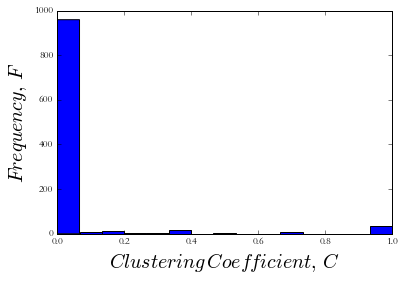

In [21]:
plt.hist(cc.values(), bins = 15)
plt.xlabel('$Clustering \, Coefficient, \, C$', fontsize = 20)
plt.ylabel('$Frequency, \, F$', fontsize = 20)
plt.show()

### 2.6 匹配系数

In [33]:
nx.degree_assortativity_coefficient(g_max)

-0.20238894672667429

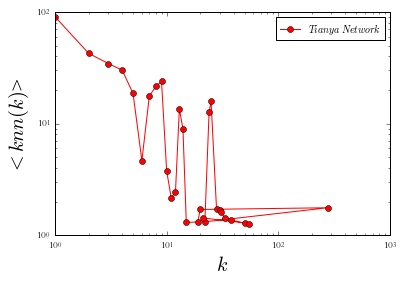

In [35]:
from collections import defaultdict
import numpy as np

l=defaultdict(list)
g = g_max

for i in g.nodes():
    k = []
    for j in g.neighbors(i):
        k.append(g.degree(j))
    l[g.degree(i)].append(np.mean(k))   
    #l.append([g.degree(i),np.mean(k)])
  
x = l.keys()
y = [np.mean(i) for i in l.values()]

#x, y = np.array(l).T
plt.plot(x, y, 'r-o', label = '$Tianya\;Network$')
plt.legend(loc=1,fontsize=10, numpoints=1)
plt.xscale('log'); plt.yscale('log')
plt.ylabel(r'$<knn(k)$> ', fontsize = 20)
plt.xlabel('$k$', fontsize = 20)
plt.show()

### 2.7 度中心性

In [36]:
dc = nx.degree_centrality(g_max)
closeness = nx.closeness_centrality(g_max)
betweenness= nx.betweenness_centrality(g_max)

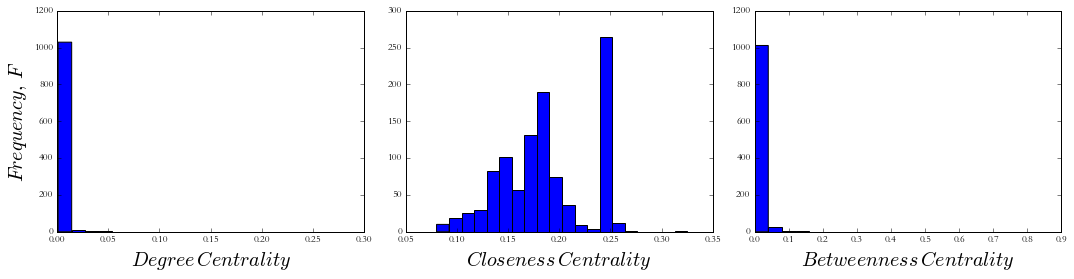

In [37]:
fig = plt.figure(figsize=(15, 4),facecolor='white')
ax = plt.subplot(1, 3, 1)
plt.hist(dc.values(), bins = 20)
plt.xlabel('$Degree \, Centrality$', fontsize = 20)
plt.ylabel('$Frequency, \, F$', fontsize = 20)

ax = plt.subplot(1, 3, 2)
plt.hist(closeness.values(), bins = 20)
plt.xlabel('$Closeness \, Centrality$', fontsize = 20)

ax = plt.subplot(1, 3, 3)
plt.hist(betweenness.values(), bins = 20)
plt.xlabel('$Betweenness \, Centrality$', fontsize = 20)
plt.tight_layout()
plt.show()

### 2.8 度分布

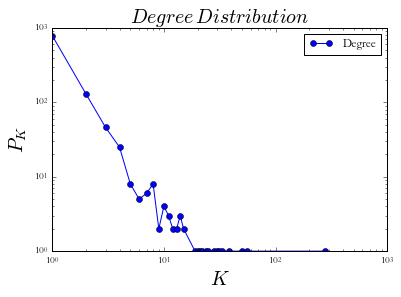

In [39]:
from collections import defaultdict
import numpy as np

def plotDegreeDistribution(G):
    degs = defaultdict(int)
    for i in G.degree().values(): degs[i]+=1
    items = sorted ( degs.items () )
    x, y = np.array(items).T
    plt.plot(x, y, 'b-o')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(['Degree'])
    plt.xlabel('$K$', fontsize = 20)
    plt.ylabel('$P_K$', fontsize = 20)
    plt.title('$Degree\,Distribution$', fontsize = 20)
    plt.show()   
    
G = g_max    
plotDegreeDistribution(G)

### 2.9 回帖描述小节
### 回帖网络中共有1046个节点，1173条边，平均连接度为2.2428，平均路径长度为5.68，网络直径为20，网络密度为0.002。从数据来看属于比较疏松的网络。
### 聚集系数、匹配系数、度中心性与度分布具体见上文中统计图。度分布符合泊松分布，可判断该网络为BA网络。

## 3、回帖网络g_max可视化分析

### 3.1 可视化g_max网络图

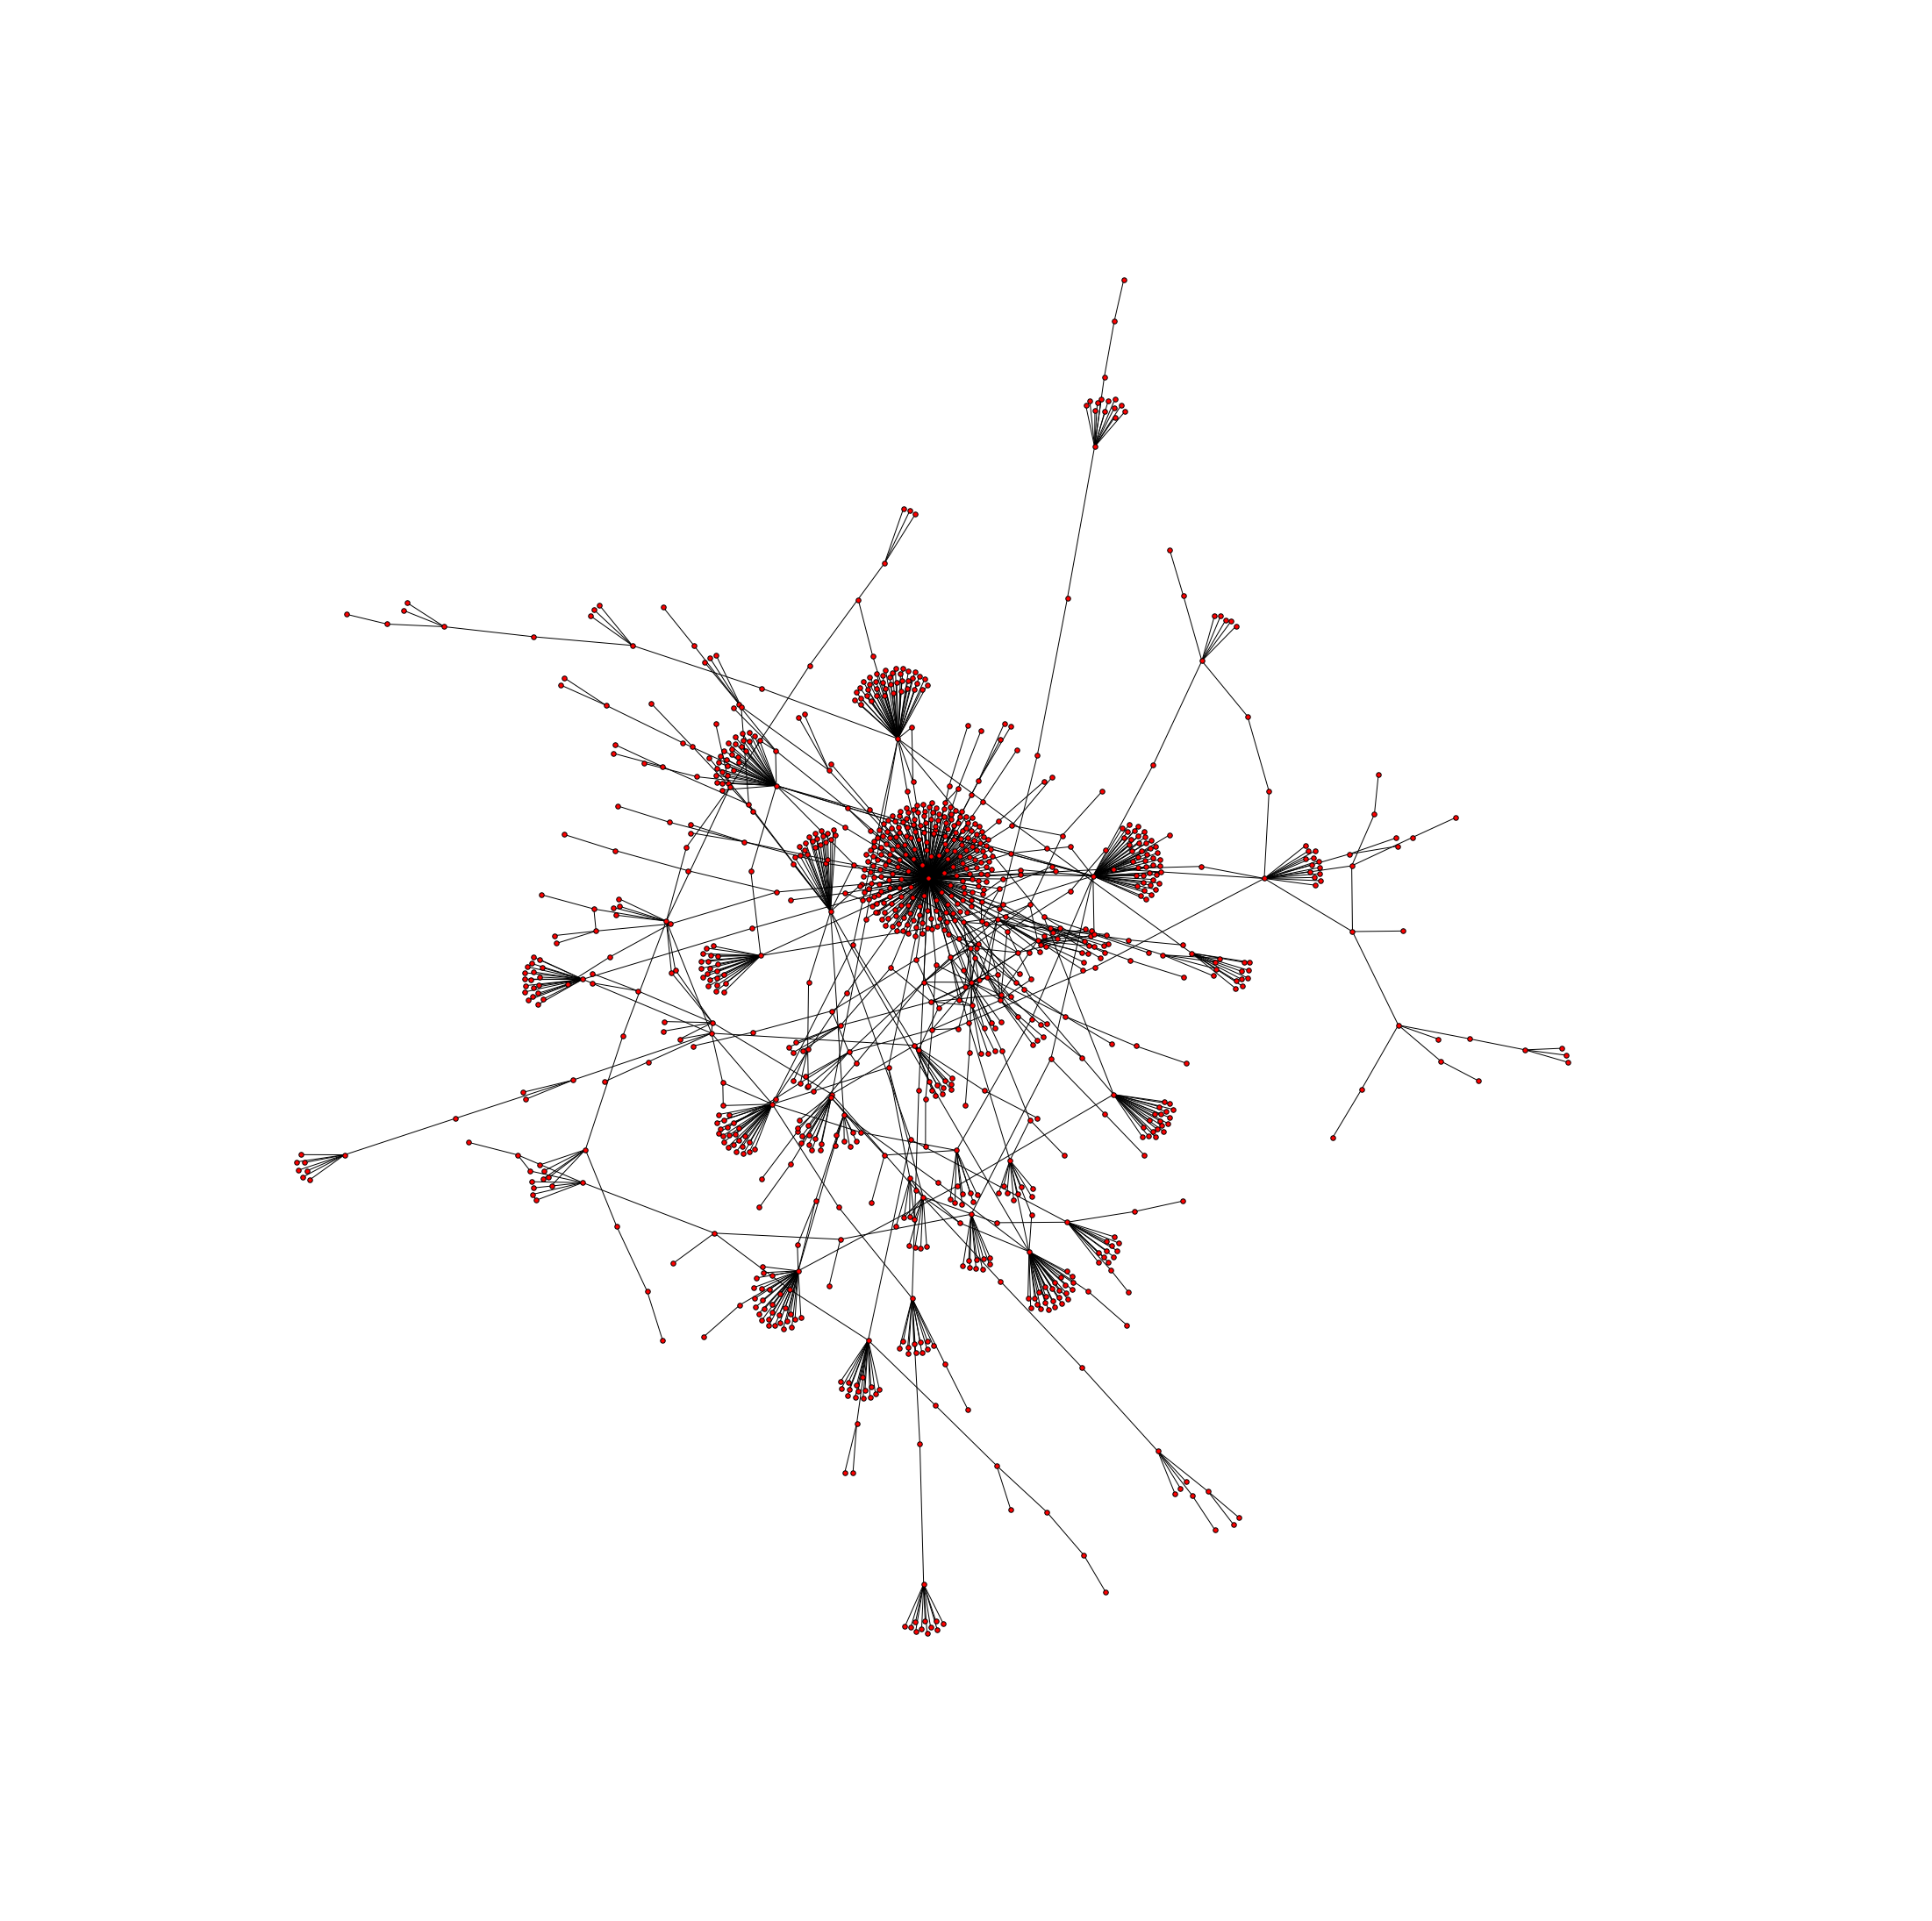

In [34]:
plt.figure(figsize=(30,30))
pos = nx.spring_layout(g_max)          
#定义一个布局，此处采用了spring布局方式
nx.draw(g_max,pos,with_labels=False,node_size = 30,width=1.0)  
#绘制规则图的图形，with_labels决定节点是非带标签（编号）,node_size是节点的直径
plt.show()  #显示图形

In [ ]:
#不要运行这块代码，不然图片太大浏览器会崩溃！
plt.figure(figsize=(150,150))
pos = nx.spring_layout(g_max)          
#定义一个布局，此处采用了spring布局方式
nx.draw(g_max,pos,with_labels=True,node_size = 30,width=1.0)  
#绘制规则图的图形，with_labels决定节点是非带标签（编号）,node_size是节点的直径
plt.savefig("C:/Users/lenovo/Desktop/finalproject/g_max image.png") 

### 由于图片过大，已将带有节点名(node label)的图片上传至网盘。
### 可至链接：http://pan.baidu.com/s/1mhA8Wqc 密码：o7uy 下载

## 3.2 回帖网络节点分析

### 上文已述，此回帖网络属于BA网络。在此网络中，连接度最高的节点为网友“无国岂敢有家”，与253个其他节点相连。其次为网友“静待花开211”，与35个其他节点相连。
### 连接度大于10的节点仅有11个，占节点总数的1.05%。
### 连接度大于平均连接度的节点为55个，占节点总数的5.25%。

## 4、回帖网络研究发现
### （1）、关于"GDP"这个话题，1040个帖子中中共有1046个网友发表了留言。由于帖子抓取自“天涯论坛经济版”，且帖子数量与发表评论网友数量相差不大，说明有部分网友经常在此版发表评论。
### （2）、网络回帖所构成的网络较为分散、疏松，连接度也比较低。
### （2）、网友的回帖网络符合BA网络特性，此网络由少数核心节点串联，大部分节点连接度低于网络平均连接度。说明在“GDP”这个话题下，大多数网友只是单独发表自己意见，相互间所形成的讨论较少。